Рафик, привет! Меня зовут Ефимов Денис и сегодня я буду делать ревью твоего проекта!\
В Практикуме принято общаться на "ты", однако если это неудобно - дай знать, и можем перейти на более официальное общение.

Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку: 

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Если все сделано хорошо. </div>

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> Некритичное замечание; если таких замечаний меньше трех — проект может быть принят без их отработки.</div>

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> Грубая ошибка, необходимо исправить, иначе проект не будет принят.
</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
Например так:
<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Hello World! ✔
</div>

Или можешь использовать эту галочку ✔ в моих комментариях, если писать особо нечего.

<div class="alert alert-block alert-warning">
<b>Общее впечатление:</b> 
    
- Ты проделал огромную работу и проект получился достаточно хорошим:)
- У меня есть несколько замечаний, которые нужно исправить.
- Пробегись по моим комментариям, исправь недочёты и всё будет отлично :)
    
</div>



<div class="alert alert-block alert-success">
<b>Рафик, спасибо за доработки, проект принят, молодец!</b>
    
Ты отлично справился с заданием в принципе с первого раза! Просто нужно быть немного внимательнее к деталям)) Успехов в дальнейшем обучении!🙂
    

# Определение перспективного тарифа для телеком-компании

В компании «Мегалайн» клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Нам нужно понять, какой тариф приносит больше денег, чтобы скорректировать рекламный бюджет.

Мы сделаем предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна». Мы проанализируем поведение клиентов и сделем вывод — какой тариф лучше.

**Цель исследования** - проверить две гипотезы:
1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

**Ход исследования**

Данные о поведении пользователей мы получим из файлов: calls.csv, internet.csv, messages.csv, tariffs.csv, users.csv.

Наше исследование пройдёт в четыре этапа:
1. Обзор данных
2. Подготовка данных
3. Анализ данных
4. Проверка гипотиз
5. Написание общего вывода

## 1 Обзор данных

Изучим исходные датафреймы. Посмотрим информацию и выведем датафреймы на экран.

In [1]:
import pandas as pd
import numpy as np
try: 
    df_users = pd.read_csv('Downloads/users.csv')
    df_calls = pd.read_csv('Downloads/calls.csv')
    df_internet = pd.read_csv('Downloads/internet.csv')
    df_messages = pd.read_csv('Downloads/messages.csv')
    df_tariffs = pd.read_csv('Downloads/tariffs.csv')
except:
    df_users = pd.read_csv('/datasets/users.csv')
    df_calls = pd.read_csv('/datasets/calls.csv')
    df_internet = pd.read_csv('/datasets/internet.csv')
    df_messages = pd.read_csv('/datasets/messages.csv')
    df_tariffs = pd.read_csv('/datasets/tariffs.csv')

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Здорово, что используешь конструкцию try-except!  </div>

In [2]:
display(df_users)
display(df_calls)
display(df_internet)
display(df_messages)
display(df_tariffs)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Получим информацию о каждом датафрейме

In [3]:
display(df_users.info())
display(df_calls.info())
display(df_internet.info())
display(df_messages.info())
display(df_tariffs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

### 1.1 Вывод
При первичном обзоре файлов никаких проблем не обнаружено. Предварительно можно утверждать, что, данных достаточно для проверки гипотез.

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Отлично, с данными познакомились!  </div>

## 2 Подготовка данных

### 2.1 Объединим датафреймы в один

Для этого посчитаем для каждого пользователя:
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам.

Для начала - округлим длительность звонков в большую сторону, в соответствии с правилами компании «Мегалайн».

In [4]:
df_calls['duration'] = df_calls['duration'].apply(np.ceil) 
display(df_calls.head(5))

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000


<div class="alert alert-block alert-success">
<b>🔁Комментарий ревьюера:</b>

<s>Необходимые для исследования библиотеки лучше импортировать в самом начале в отдельной ячейке</div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Исправил
</div>

Добавим столбец для интернет-трафика в гигабайтах для каждого абонента.

In [5]:
df_internet['gb_used'] = (df_internet['mb_used']/1024)
df_internet.head(5)

,Unnamed: 0,id,mb_used,session_date,user_id,gb_used
0,0,1000_0,112.95,2018-11-25,1000,0.110303
1,1,1000_1,1052.81,2018-09-07,1000,1.028135
2,2,1000_2,1197.26,2018-06-25,1000,1.169199
3,3,1000_3,550.27,2018-08-22,1000,0.537373
4,4,1000_4,302.56,2018-09-24,1000,0.295469


<div class="alert alert-block alert-success">
<b>❌Комментарий ревьюера:</b> 
    
<s>Звонки ты округлил верно, а вот трафик округляется только после итогового суммирования за месяц

  <s>  Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

</div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Исправил
</div>

Добавим столбец с месяцем звонка для каждого абонента.

In [6]:
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month
display(df_calls.head(5))

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12


Создадим две сводные таблицы:
1. calls_count, в которой будет количество звонков. Сделаем группировку по абоненам и месяцам.
2. calls_duration, в которой будет длительность звонков. Сделаем группировку по абоненам и месяцам.

In [7]:
calls_count = df_calls.pivot_table(index = ['user_id', 'month'],  values = 'call_date', aggfunc = 'count')
calls_count.columns = ['call_count']

calls_duration = df_calls.pivot_table(index = ['user_id', 'month'],  values = 'duration', aggfunc = 'sum')
calls_duration.columns = ['call_duration']

In [8]:
calls_count = calls_count.reset_index()
calls_duration = calls_duration.reset_index()

In [9]:
display(calls_count.head(5))
display(calls_duration.head(5))

,user_id,month,call_count
0,1000,5,22
1,1000,6,43
2,1000,7,47
3,1000,8,52
4,1000,9,58


,user_id,month,call_duration
0,1000,5,159.0
1,1000,6,172.0
2,1000,7,340.0
3,1000,8,408.0
4,1000,9,466.0


Добавим столбец с месяцем сообщения для каждого абонента.

In [10]:
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month
display(df_messages.head(5))

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


Создадим сводную таблицу messages_count, в которой будет количество сообщений. Сделаем группировку по абоненам и месяцам.

In [11]:
messages_count = df_messages.pivot_table(index = ['user_id', 'month'],  values = 'message_date', aggfunc = 'count')
messages_count.columns = ['message_count']
messages_count = messages_count.reset_index()
messages_count.head(5)

,user_id,month,message_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


Добавим столбец с месяцем каждой сессии выхода в интернет для каждого абонента.

In [12]:
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month
display(df_internet.head(5))

,Unnamed: 0,id,mb_used,session_date,user_id,gb_used,month
0,0,1000_0,112.95,2018-11-25,1000,0.110303,11
1,1,1000_1,1052.81,2018-09-07,1000,1.028135,9
2,2,1000_2,1197.26,2018-06-25,1000,1.169199,6
3,3,1000_3,550.27,2018-08-22,1000,0.537373,8
4,4,1000_4,302.56,2018-09-24,1000,0.295469,9


Создадим сводную таблицу internet_count, в которой будет количество использованных гигабайт интернета в месяц. Сделаем группировку по абоненам и месяцам.

In [13]:
internet_count = df_internet.pivot_table(index = ['user_id', 'month'],  values = 'gb_used', aggfunc = 'sum')
internet_count.columns = ['traffic_gb']
internet_count = internet_count.reset_index()
internet_count.head(5)

,user_id,month,traffic_gb
0,1000,5,2.200674
1,1000,6,22.689229
2,1000,7,13.675430
3,1000,8,13.726494
4,1000,9,14.227451


При помощи метода merge объединим датафреймы с информацией о пользователях, продолжительностью звонков, количеством сообщений, использованных гигабайт интернета в одну большую таблицу.

In [14]:
df_big1 = df_users.merge(calls_count, on=['user_id'], how='outer')
df_big2 = df_big1.merge(calls_duration, on=['user_id', 'month'], how='outer')
df_big3 = df_big2.merge(messages_count, on=['user_id', 'month'], how='outer')
df = df_big3.merge(internet_count, on=['user_id', 'month'], how='outer')

Приведем данные к нужным типам, округлим интернет-трафик в большую сторону и выведем полученный датафрейм на экран.

In [15]:
df['month'] = df['month'].astype("Int64")
df['call_count'] = df['call_count'].astype("Int64")
df['call_duration'] = df['call_duration'].astype("Int64")
df['message_count'] = df['message_count'].astype("Int64")
df['traffic_gb'] = df['traffic_gb'].apply(np.ceil).astype("Int64")

df.head(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,call_count,call_duration,message_count,traffic_gb
0,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,22,159,22,3
1,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6,43,172,60,23
2,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7,47,340,75,14
3,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8,52,408,81,14
4,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9,58,466,57,15


Проверим типы данных в полученной таблице

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3222 entries, 0 to 3221
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        3222 non-null   int64  
 1   age            3182 non-null   float64
 2   churn_date     189 non-null    object 
 3   city           3182 non-null   object 
 4   first_name     3182 non-null   object 
 5   last_name      3182 non-null   object 
 6   reg_date       3182 non-null   object 
 7   tariff         3182 non-null   object 
 8   month          3214 non-null   Int64  
 9   call_count     3174 non-null   Int64  
 10  call_duration  3174 non-null   Int64  
 11  message_count  2717 non-null   Int64  
 12  traffic_gb     3203 non-null   Int64  
dtypes: Int64(5), float64(1), int64(1), object(6)
memory usage: 368.1+ KB


Проверим количество пропусков в полученной таблице

In [17]:
display(df['call_duration'].isna().sum())
display(df['message_count'].isna().sum())
display(df['traffic_gb'].isna().sum())
display(df['call_count'].isna().sum())

48

505

19

48

Заменим пропуски на нули

In [18]:
df['call_duration'] = df['call_duration'].fillna(0)
df['message_count'] = df['message_count'].fillna(0)
df['traffic_gb'] = df['traffic_gb'].fillna(0)
df['call_count'] = df['call_count'].fillna(0)

Проверим пропуски снова

In [19]:
display(df['call_duration'].isna().sum())
display(df['message_count'].isna().sum())
display(df['traffic_gb'].isna().sum())
display(df['call_count'].isna().sum())

0

0

0

0

Выведем обновлённый датафрейм.

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b>

Молодец, что обработал пропуски!</div>

In [20]:
df.head(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,call_count,call_duration,message_count,traffic_gb
0,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,22,159,22,3
1,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6,43,172,60,23
2,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7,47,340,75,14
3,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8,52,408,81,14
4,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9,58,466,57,15


<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b>

Объединение данных произвел правильно!</div>

### 2.2 Посчитаем помесячную выручку с каждого пользователя

Для этого:
1. вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; 
2. остаток умножим на значение из тарифного плана;
3. прибавим абонентскую плату, соответствующую тарифному плану

Создадим новый столбец 'call_duration_over', в котором будет количество минут для каждого абонента сверх тарифа. Для этого вычтем бесплатный лимит из суммарного количества звонков для каждого тарифа. Отрицательные значения заменим на 0.

In [21]:
df.loc[df['tariff'] == 'smart', 'call_duration_over'] = df['call_duration'] - 500
df.loc[df['tariff'] == 'ultra', 'call_duration_over'] = df['call_duration'] - 3000

# заменим отрицательные на 0
df.loc[df['call_duration_over'] < 0, 'call_duration_over'] = 0

Создадим новый столбец 'message_count_over', в котором будет количество сообщений для каждого абонента сверх тарифа. Для этого вычтем бесплатный лимит из суммарного количества сообщений для каждого тарифа. Отрицательные значения заменим на 0.

In [22]:
df.loc[df['tariff'] == 'smart', 'message_count_over'] = df['message_count'] - 50
df.loc[df['tariff'] == 'ultra', 'message_count_over'] = df['message_count'] - 1000

# заменим отрицательные на 0
df.loc[df['message_count_over'] < 0, 'message_count_over'] = 0

Создадим новый столбец 'traffic_gb_over', в котором будет количество интернет-трафика в гигабайтах для каждого абонента сверх тарифа. Для этого вычтем бесплатный лимит из суммарного количества интернет-траффика для каждого тарифа. Отрицательные значения заменим на 0.

In [23]:
df.loc[df['tariff'] == 'smart', 'traffic_gb_over'] = df['traffic_gb'] - 15
df.loc[df['tariff'] == 'ultra', 'traffic_gb_over'] = df['traffic_gb'] - 30

# заменим отрицательные на 0
df.loc[df['traffic_gb_over'] < 0, 'traffic_gb_over'] = 0

Для каждого тарифа добавим столбец price (помесячную выручку с каждого пользователя).

In [24]:
df.loc[df['tariff'] == 'smart', 'price'] = (550 + df['call_duration_over']*3 + df['message_count_over']*3 + 
                                            df['traffic_gb_over']*200)

df.loc[df['tariff'] == 'ultra', 'price'] = (1950 + df['call_duration_over'] + df['message_count_over'] + 
                                            df['traffic_gb_over']*150)

Выведем обновлённый датафрейм

In [25]:
df.head(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,call_count,call_duration,message_count,traffic_gb,call_duration_over,message_count_over,traffic_gb_over,price
0,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,22,159,22,3,0.0,0.0,0.0,1950.0
1,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6,43,172,60,23,0.0,0.0,0.0,1950.0
2,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7,47,340,75,14,0.0,0.0,0.0,1950.0
3,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8,52,408,81,14,0.0,0.0,0.0,1950.0
4,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9,58,466,57,15,0.0,0.0,0.0,1950.0


<div class="alert alert-block alert-success">
<b>❌Комментарий ревьюера:</b> 
    
<S>Из-за некорректного округления интернет-трафика итоговая выручка получилась неверной
</div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Исправил
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Теперь все отлично!👍  </div>

 ## 3 Анализ данных

Опишем поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы. Опишем распределения.

Создадим срезы для абонентов с тарифом smart и ultra.

In [26]:
df_smart = df.query('tariff == "smart"')
df_ultra = df.query('tariff == "ultra"')

Найдем дисперсию, стандартное отклонение и среднее для звонков тарифа smart

In [27]:
variance = np.var(df_smart['call_duration'])
standard_deviation = np.sqrt(variance)

print('Для звонков тарифа smart:')
print('Дисперсия равна', variance) 
print('Стандартное отклонение  равно', standard_deviation)
print('Среднее равно', df_smart['call_duration'].mean())

Для звонков тарифа smart:
Дисперсия равна 35953.5734974877
Стандартное отклонение  равно 189.61427556354425
Среднее равно 418.68629213483143


Построим гистограмму для звонков тарифа smart

AxesSubplot(0.125,0.125;0.775x0.755)


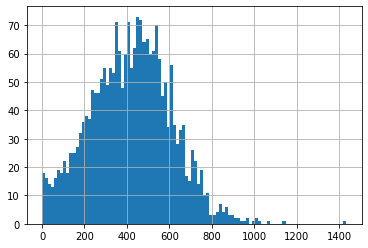

In [28]:
print(df_smart['call_duration'].hist(bins=100))

Найдем дисперсию, стандартное отклонение и среднее для звонков тарифа ultra

In [29]:
variance = np.var(df_ultra['call_duration'])
standard_deviation = np.sqrt(variance)

print('Для звонков тарифа ultra:')
print('Дисперсия равна', variance) 
print('Стандартное отклонение  равно', standard_deviation)
print('Среднее равно', df_ultra['call_duration'].mean())

Для звонков тарифа ultra:
Дисперсия равна 95367.98020852784
Стандартное отклонение  равно 308.81706592824145
Среднее равно 542.0313479623825


Построим гистограмму для звонков тарифа ultra

AxesSubplot(0.125,0.125;0.775x0.755)


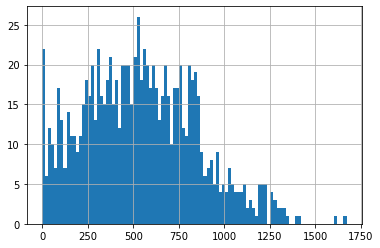

In [30]:
print(df_ultra['call_duration'].hist(bins=100))

Найдем дисперсию, стандартное отклонение и среднее для сообщений тарифа smart

In [31]:
variance = np.var(df_smart['message_count'])
standard_deviation = np.sqrt(variance)

print('Для сообщений тарифа smart:')
print('Дисперсия равна', variance) 
print('Стандартное отклонение  равно', standard_deviation)
print('Среднее равно', df_smart['message_count'].mean())

Для сообщений тарифа smart:
Дисперсия равна 798.5206615326348
Стандартное отклонение  равно 28.258107890172596
Среднее равно 33.36629213483146


<div class="alert alert-block alert-success">
<b>🔁Комментарий ревьюера:</b>

<s>Импортировать бибиотеку достаточно один раз</div>

Построим гистограмму для сообщений тарифа smart

AxesSubplot(0.125,0.125;0.775x0.755)


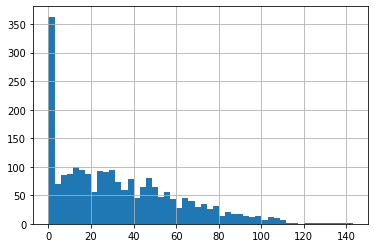

In [32]:
print(df_smart['message_count'].hist(bins=50))

Найдем дисперсию, стандартное отклонение и среднее для сообщений тарифа ultra

In [33]:
variance = np.var(df_ultra['message_count'])
standard_deviation = np.sqrt(variance)

print('Для сообщений тарифа ultra:')
print('Дисперсия равна', variance) 
print('Стандартное отклонение  равно', standard_deviation)
print('Среднее равно', df_ultra['message_count'].mean())

Для сообщений тарифа ultra:
Дисперсия равна 2197.6303779334803
Стандартное отклонение  равно 46.87889053650353
Среднее равно 48.72622779519331


Построим гистограмму для сообщений тарифа ultra

AxesSubplot(0.125,0.125;0.775x0.755)


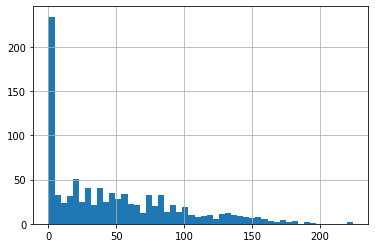

In [34]:
print(df_ultra['message_count'].hist(bins = 50))

Найдем дисперсию, стандартное отклонение и среднее для интернет трафика тарифа smart

In [35]:
variance = np.var(df_smart['traffic_gb'])
standard_deviation = np.sqrt(variance)

print('Для интернет-трафика тарифа smart:')
print('Дисперсия равна', variance) 
print('Стандартное отклонение  равно', standard_deviation)
print('Среднее равно', df_smart['traffic_gb'].mean())

Для интернет-трафика тарифа smart:
Дисперсия равна 33.28725645751799
Стандартное отклонение  равно 5.769510937464109
Среднее равно 16.31505617977528


Построим гистограмму для интернет-трафика тарифа smart

AxesSubplot(0.125,0.125;0.775x0.755)


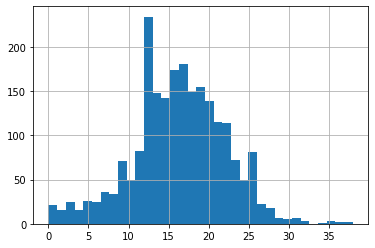

In [36]:
print(df_smart['traffic_gb'].hist(bins=35))

Найдем дисперсию, стандартное отклонение и среднее для интернет трафика тарифа ultra

In [37]:
variance = np.var(df_ultra['traffic_gb'])
standard_deviation = np.sqrt(variance)

print('Для интернет-трафика тарифа ultra:')
print('Дисперсия равна', variance) 
print('Стандартное отклонение  равно', standard_deviation)
print('Среднее равно', df_ultra['traffic_gb'].mean())

Для интернет-трафика тарифа ultra:
Дисперсия равна 99.47126000028389
Стандартное отклонение  равно 9.973527961573271
Среднее равно 19.365726227795193


Посмтроим гистограмму для интернет-трафика тарифа ultra

AxesSubplot(0.125,0.125;0.775x0.755)


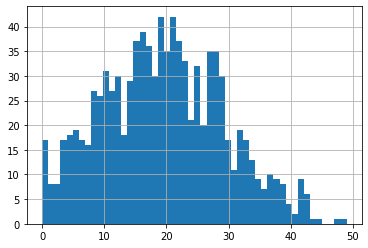

In [38]:
print(df_ultra['traffic_gb'].hist(bins=50))

Посчитаем среднюю выручку от каждого тарифа

In [39]:
print(df_smart['price'].mean())
print(df_ultra['price'].mean())

1290.2251685393258
2070.219435736677


### 3.1 Вывод

1. Пользователи тарифа smart в среднем разговаривают 419 минут, а пользователи тарифа ultra - 542.
2. Пользователи тарифа smart в среднем отправляют 33 сообщения в месяц, а пользователи тарифа ultra - 48.
3. Пользователи тарифа smart в среднем используют 16 Гб интернет-трафика в месяц, а пользователи тарифa ultra - 19.
4. Распределение звонков и интернет-трафика для обоих тарифов напоминают нормальные распределения. Распределения сообщений же для обоих тарифов - геометрическое.
5. Многие пользователи не отправляют сообщений вообще.
6. Тариф ultra в среднем приносит больше денег, чем тариф smart (2070 руб против 1290).

# 4 Проверка гипотез

Для проверки гипотез был выбран t-тест. Мы используем метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. Наши выборки независимы он не требует нормального распределения выборок, если количество наблюдений достаточно велико. 

## 4.1 Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются


* Нулевая гипотеза 1: средняя выручка пользователей тарифов «Ультра» и «Смарт» равны.
* Альтернативная гипотеза 1: средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны.

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Здорово, что формулируешь гипотезы вначале шага </div>

Проверим нулевую гипотезу при помощи t-теста

In [46]:
df_smart['price'].isna()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,call_count,call_duration,message_count,traffic_gb,call_duration_over,message_count_over,traffic_gb_over,price
8,1001,41.0,NaN,Москва,Иван,Ежов,2018-11-01,smart,11,59,430,0,18,0.0,0.0,3.0,1150.0
9,1001,41.0,NaN,Москва,Иван,Ежов,2018-11-01,smart,12,63,414,0,14,0.0,0.0,0.0,550.0
10,1002,59.0,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6,15,117,4,11,0.0,0.0,0.0,550.0
11,1002,59.0,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,7,26,214,11,18,0.0,0.0,3.0,1150.0
12,1002,59.0,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,8,42,289,13,20,0.0,0.0,5.0,1550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3177,1498,68.0,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10,41,247,42,21,0.0,0.0,6.0,1750.0
3178,1499,35.0,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,9,9,70,11,2,0.0,0.0,0.0,550.0
3179,1499,35.0,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,10,68,449,48,18,0.0,0.0,3.0,1150.0
3180,1499,35.0,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,11,74,612,59,18,112.0,9.0,3.0,1513.0


In [40]:
from scipy import stats as st

sample_1 = df_smart['price']
sample_2 = df_ultra['price']

alpha = .05

results = st.ttest_ind(
    sample_1, 
    sample_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 2.7573403948209683e-156
Отвергаем нулевую гипотезу


С уверенностью отвергаем нулевую гипотезу и делаем вывод, что средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны.

## 4.2 Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

* Нулевая гипотеза 2: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.
* Альтернативная гипотеза 2: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Создадим два новых датафрейма:
* df_moscow - для пользователей из Москвы
* df_not_moscow - для пользователей не из Москвы

In [41]:
df_moscow = df.query('city == "Москва"')
df_not_moscow =  df.query('city != "Москва"').copy()

Проверим сколько пропусков в датафреймах

In [42]:
display(df_not_moscow['price'].isna().sum())
display(df_moscow['price'].isna().sum())

40

0

Заменим пропуски для пользователей не из Москвы мединным значением

In [43]:
df_not_moscow['price'] = df_not_moscow['price'].fillna(df_not_moscow['price'].median())

In [44]:
df_not_moscow['price'].isna().sum()

0

Проверим нулевую гипотезу 2 при помощи t-теста

In [45]:
sample_1 = df_moscow['price']
sample_2 = df_not_moscow['price']

alpha = .05

results = st.ttest_ind(
    sample_1, 
    sample_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.4732412711660239
Не получилось отвергнуть нулевую гипотезу


Не отвергаем нулевую гипотзеу (вероятность 47 проценов, что средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов)

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Алгоритм проверки гипотез правильно проработан. Нужно будет заново провести проверку для уточнения после перерасчета выручки. </div>

# 5 Общий вывод

1. В ходе исследования мы взяли нужную нам информацию из исходных датафреймов и объединили всё в одну большую таблицу, с которой нам было удобно работать.
2. Мы установили, что пользователи тарифа smart разговаривают меньше, чем пользователи тарифа ultra (419 против 542 минут), отправляют меньше сообщений (33 против 48), а также меньше интернет-трафика (16 Гб против 19).
3. Гипотеза о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются подтвердилась.
4. Гипотеза о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов не подтвердилась.
5. Тариф ultra лучше, так как в среднем приносит больше денег, чем тариф smart (2070 руб против 1290).

<div class="alert alert-block alert-success">
<b>❌Комментарий ревьюера:</b> 
    
<s>Какой тариф все-таки лучше?
</div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Исправил
</div>